In [96]:
import pandas as pd
import numpy as np

In [222]:
df = pd.read_csv('../data/train.csv', encoding='cp949')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [225]:
df = df.dropna()

In [ ]:
df = df.dropna()
display(len(df))
display(df.columns.unique())
display(df.Churn.value_counts())
display(df.isnull().sum())
display(df.duplicated().sum())
display(df.describe())
display(df.info())

In [224]:
51047 - 49752

1295

In [ ]:
df.info()
# 전체 행수 51047
# 컬럼 수 58
# 행 수 49752  
# 결측치 1295

In [ ]:
df['CustomerID'].dropna().value_counts()

#### 결측치

In [70]:
# 51047
temp = df.isna().sum()[df.isna().sum() > 0]
temp

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
grade                    156
dtype: int64

In [81]:
# Churn 비율 확인
rate = df['Churn'].value_counts(normalize=True)
rate

Churn
No     0.71368
Yes    0.28632
Name: proportion, dtype: float64

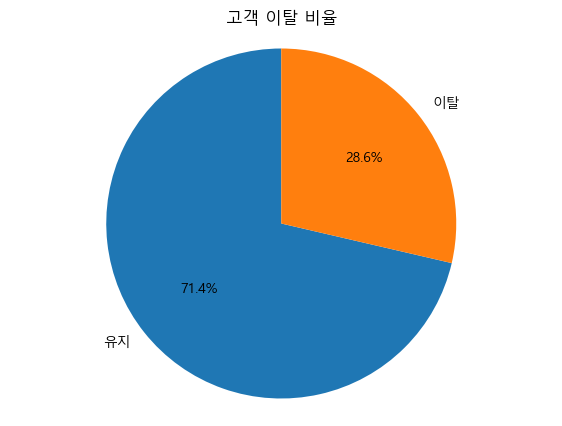

In [80]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

rate = df['Churn'].value_counts(normalize=True)

plt.figure(figsize=(7, 5))
wedges, texts, autotexts = plt.pie(rate.values, labels=rate.index, autopct='%1.1f%%', startangle=90)
plt.title("고객 이탈 비율")
plt.axis('equal')

new_labels = ['유지', '이탈']  # 새로운 레이블 리스트
for i, text in enumerate(texts):
    text.set_text(new_labels[i])

plt.show()


In [60]:
df.loc[:, ~df.columns.isin(['CustomerID'])]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CustomerID                 49752 non-null  int64   
 1   Churn                      49752 non-null  object  
 2   MonthlyRevenue             49752 non-null  float64 
 3   MonthlyMinutes             49752 non-null  float64 
 4   TotalRecurringCharge       49752 non-null  float64 
 5   DirectorAssistedCalls      49752 non-null  float64 
 6   OverageMinutes             49752 non-null  float64 
 7   RoamingCalls               49752 non-null  float64 
 8   PercChangeMinutes          49752 non-null  float64 
 9   PercChangeRevenues         49752 non-null  float64 
 10  DroppedCalls               49752 non-null  float64 
 11  BlockedCalls               49752 non-null  float64 
 12  UnansweredCalls            49752 non-null  float64 
 13  CustomerCareCalls          49752 non

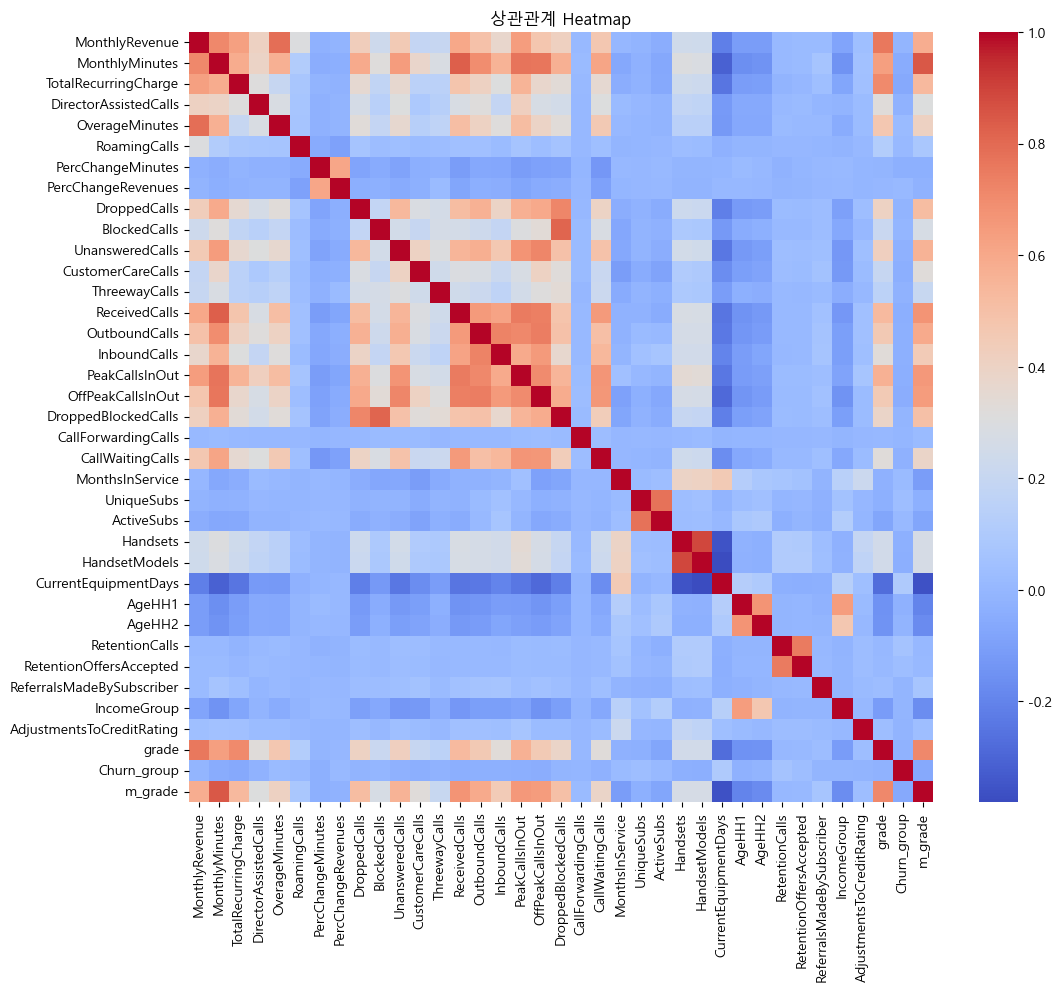

In [216]:
# font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

num_data = df.loc[:, ~df.columns.isin(['CustomerID'])].select_dtypes(include=['float64', 'int64', 'int32']).columns
corr = df[num_data].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('상관관계 Heatmap')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2400\1401006317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['AgeHH1'], bins=[0, 30, 40, 50, 60, 100], labels=['20', '30', '40', '50', '60'])


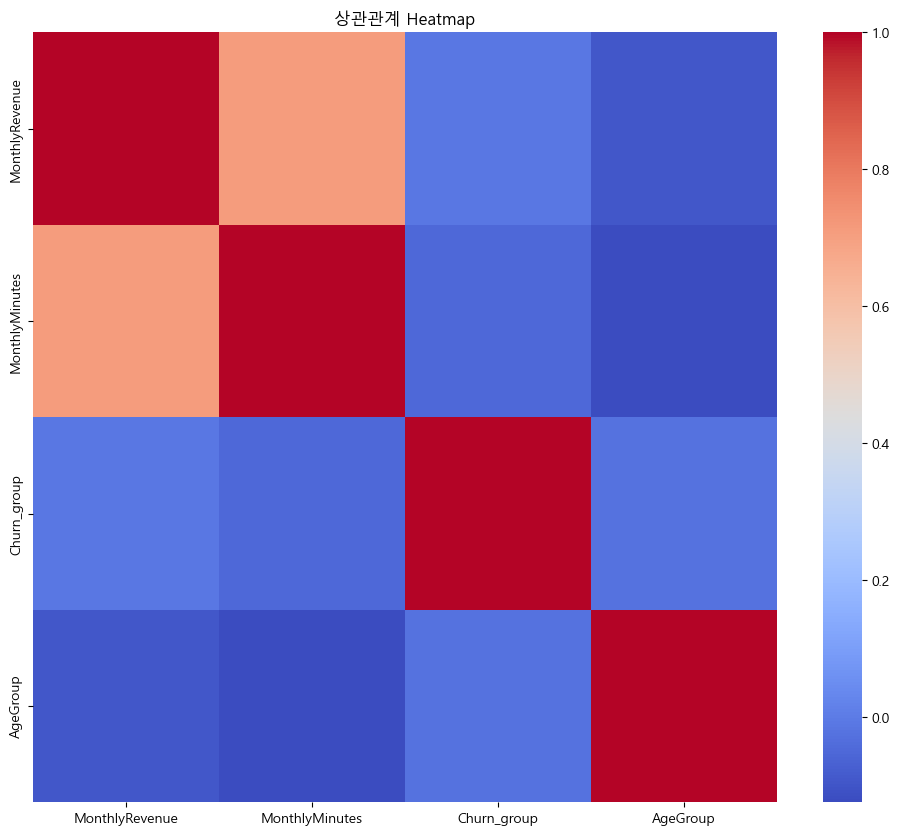

In [201]:
# MonthlyRevenue
# MonthlyMinutes
# Churn_group
# AgeGroup
# df['AgeGroup'] = pd.cut(df['AgeHH1'], bins=[0, 30, 40, 50, 60, 100], labels=['20', '30', '40', '50', '60'])
num_data = df.loc[:, ['MonthlyRevenue','MonthlyMinutes','Churn_group']].columns
corr = df[num_data].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('상관관계 Heatmap')
plt.show()

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CustomerID                 49752 non-null  int64   
 1   Churn                      49752 non-null  object  
 2   MonthlyRevenue             49752 non-null  float64 
 3   MonthlyMinutes             49752 non-null  float64 
 4   TotalRecurringCharge       49752 non-null  float64 
 5   DirectorAssistedCalls      49752 non-null  float64 
 6   OverageMinutes             49752 non-null  float64 
 7   RoamingCalls               49752 non-null  float64 
 8   PercChangeMinutes          49752 non-null  float64 
 9   PercChangeRevenues         49752 non-null  float64 
 10  DroppedCalls               49752 non-null  float64 
 11  BlockedCalls               49752 non-null  float64 
 12  UnansweredCalls            49752 non-null  float64 
 13  CustomerCareCalls          49752 non

C:\Users\USER\AppData\Local\Temp\ipykernel_2400\4439641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn_group'] = np.where(df['Churn'] == 'Yes', 2, 1)


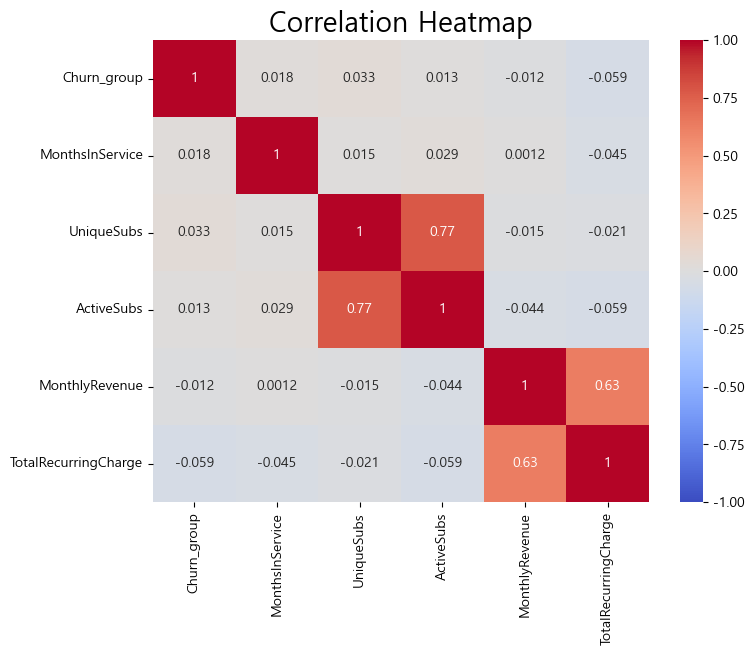

In [209]:

df['Churn_group'] = np.where(df['Churn'] == 'Yes', 2, 1)

columns = ['Churn_group', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'MonthlyRevenue', 'TotalRecurringCharge']

corr = df[columns].corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', size=20)
plt.show()

In [ ]:
# font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

num_data = df.loc[:, ~df.columns.isin(['CustomerID'])]
corr = df[num_data].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('상관관계 Heatmap')
plt.show()

#### 이탈 고객과 유지 고객 수 비교

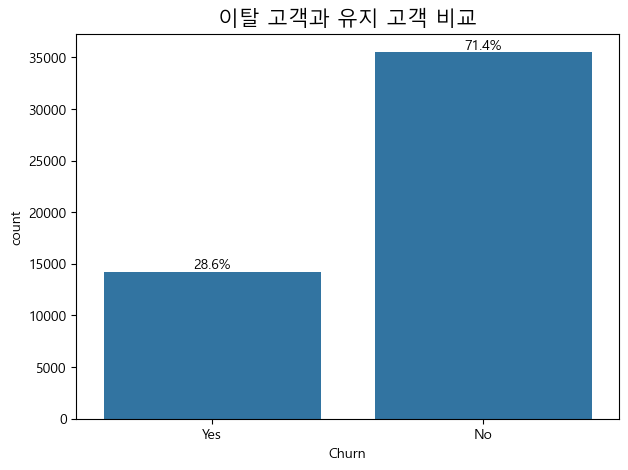

In [192]:

# 차트 생성
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Churn', data=df)
plt.title('이탈 고객과 유지 고객 비교', size=15)

# 전체 고객 수 계산
total = len(df)

# 각 막대 위에 비율 레이블 추가
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total * 100):.1f}%'
    ax.annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


In [ ]:
MonthlyRevenue
MonthlyMinutes
Churn_group
AgeGroup


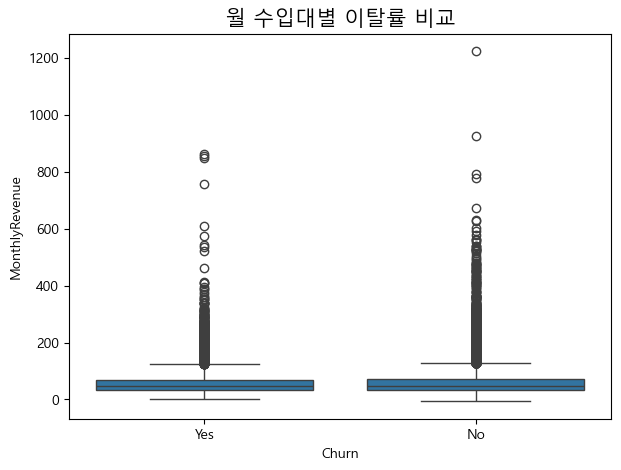

In [194]:
plt.figure(figsize = (7, 5))
sns.boxplot(x='Churn', y='MonthlyRevenue', data=df)
plt.title('월 수입대별 이탈률 비교', size=15)
plt.show()

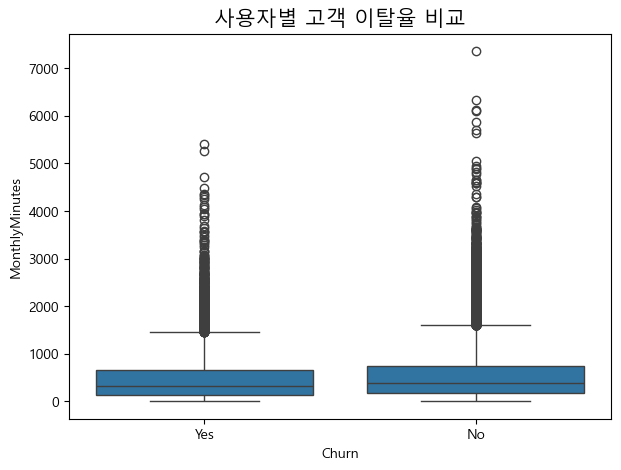

In [197]:
plt.figure(figsize = (7, 5))
sns.boxplot(x='Churn', y='MonthlyMinutes', data=df)
plt.title('사용자별 고객 이탈율 비교', size=15)
plt.show()

In [94]:
df['Churn'].value_counts()


Churn
No     35507
Yes    14245
Name: count, dtype: int64

In [ ]:
# MonthlyRevenue를 10개의 구간으로 나누기
df['grade'] = pd.qcut(df['MonthlyRevenue'], q=10, labels=False)
df['Churn_group'] = np.where(df['Churn'] == 'Yes', 1, 0)

# df
# 각 구간별 이탈률 계산
rate = df.groupby('grade')['Churn_group'].mean().reset_index()
# rate

# # # 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='grade', y='Churn_group', data=rate)

plt.title('월간 수익 구간별 이탈률', fontsize=16)
plt.xlabel('월간 수익 구간 (낮음 -> 높음)', fontsize=12)
plt.ylabel('이탈률', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45)

# # 각 막대 위에 이탈률 표시
for i, v in enumerate(rate['Churn_group']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [163]:
# MonthlyRevenue를 10개의 구간으로 나누기
df['grade'] = pd.qcut(df['MonthlyRevenue'], q=10, labels=False)
df['Churn_group'] = np.where(df['Churn'] == 'Yes', 1, 0)

# df
# 각 구간별 이탈률 계산
rate = df.groupby('grade')['Churn_group'].mean().reset_index()
# rate

# # # 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='grade', y='Churn_group', data=rate)

plt.title('월간 수익 구간별 이탈률', fontsize=16)
plt.xlabel('월간 수익 구간 (낮음 -> 높음)', fontsize=12)
plt.ylabel('이탈률', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45)

# # 각 막대 위에 이탈률 표시
for i, v in enumerate(rate['Churn_group']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,grade,Churn_group,RevenueBin,AgeGroup
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,30,Yes,1-Highest,Suburban,Professional,No,0,1,1,60 이상
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,30,No,4-Medium,Suburban,Professional,Yes,0,1,1,30
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,Unknown,No,3-Good,Town,Crafts,Yes,3,0,4,30 미만
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,10,No,4-Medium,Other,Other,No,8,0,9,30 미만
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,10,No,1-Highest,Other,Professional,Yes,0,1,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,...,Unknown,No,2-High,Other,Professional,No,0,0,1,40
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,Unknown,No,3-Good,Other,Other,Yes,2,0,3,50
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,Unknown,No,1-Highest,Other,Professional,Unknown,7,0,8,40
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,30,No,5-Low,Other,Professional,Yes,9,1,10,30 미만


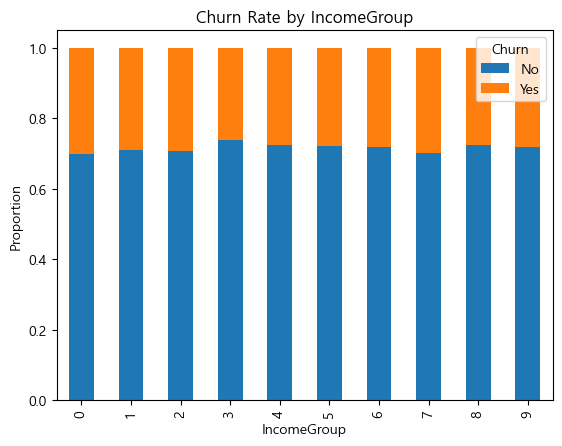

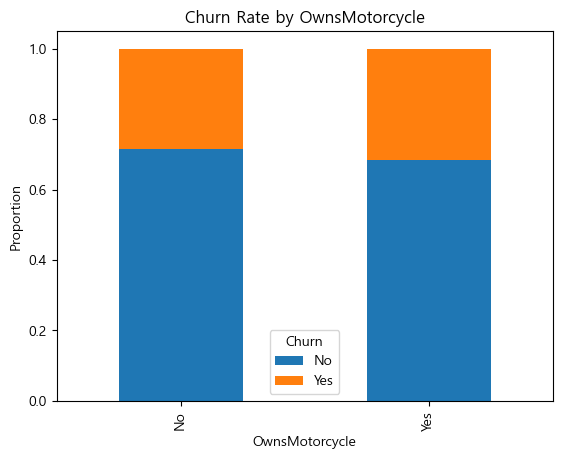

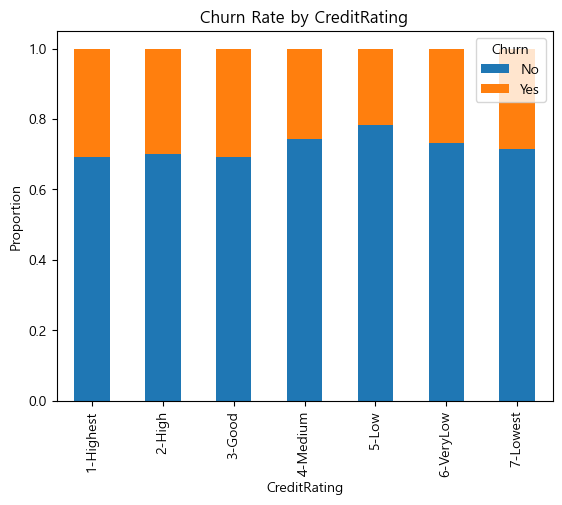

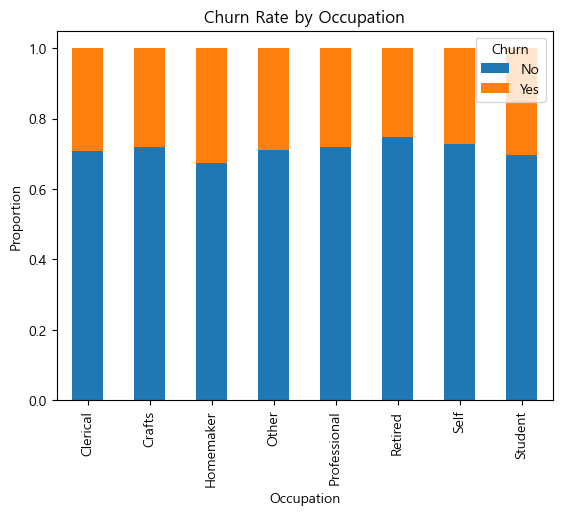

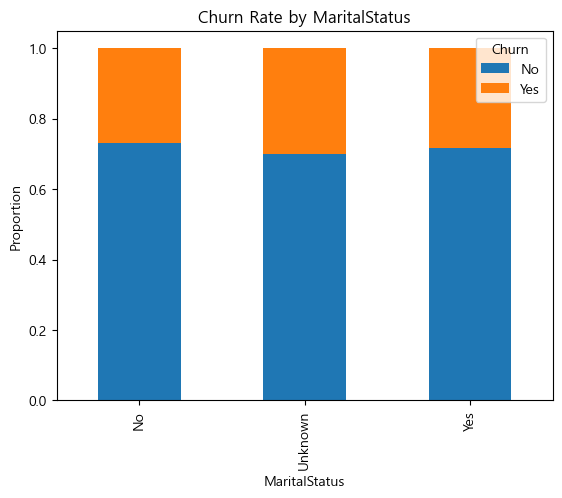

In [143]:
# 카테고리별 Churn 비율
# IncomeGroup 소득계층
# OwnsMotorcycle 오토바이 여부
# CreditRating 등급(1~7)
# Occupation: 직업
# MaritalStatus: 결혼 여부
categorical_columns = ['IncomeGroup', 'OwnsMotorcycle', 'CreditRating', 'Occupation', 'MaritalStatus']
for col in categorical_columns:
    churn_by_category = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_by_category.plot(kind='bar', stacked=True)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Proportion')
    plt.show()

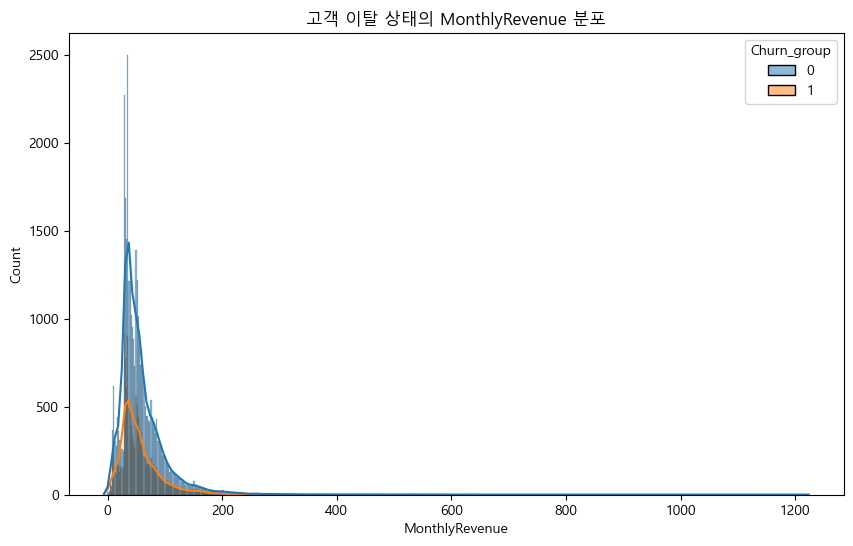

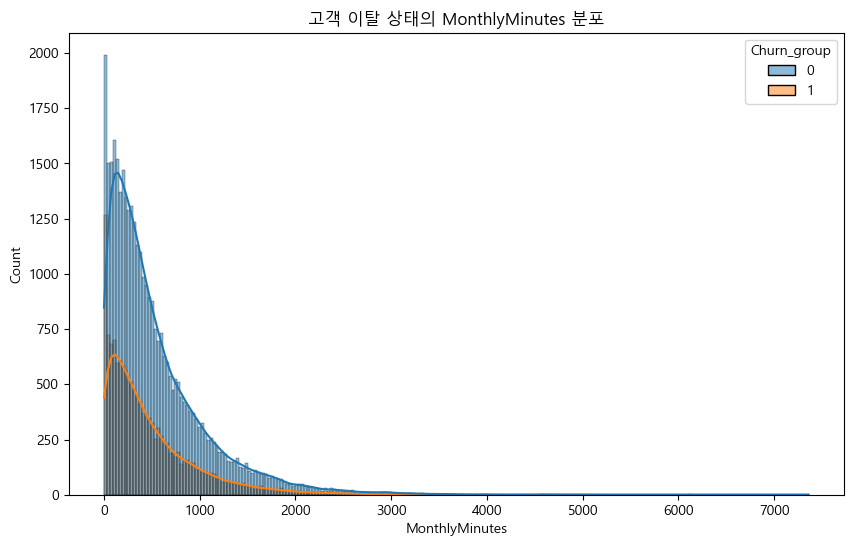

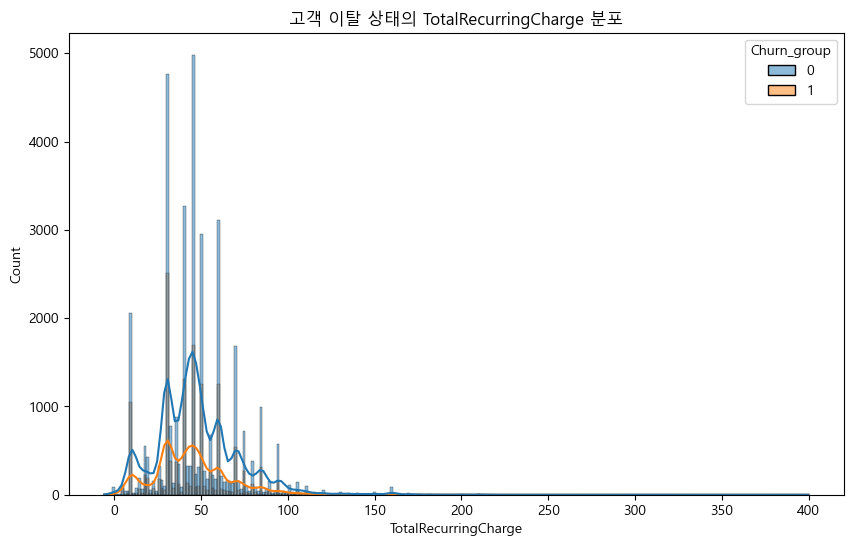

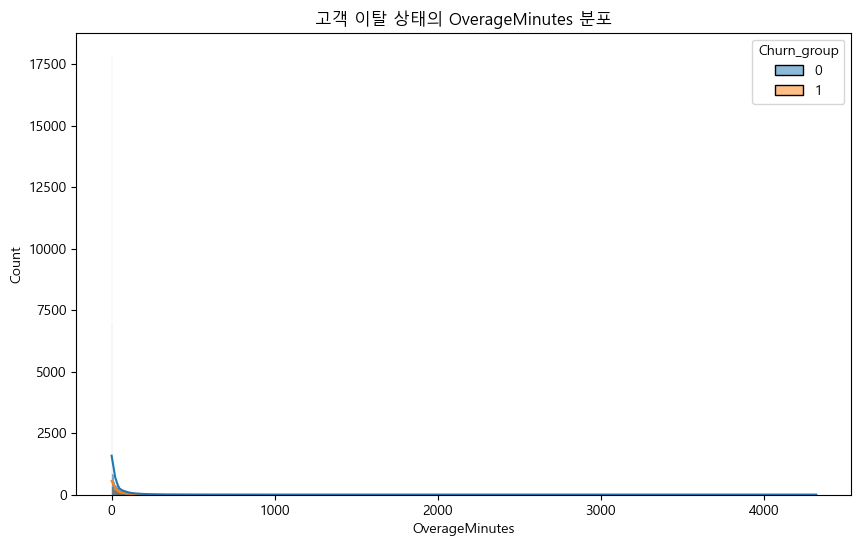

In [159]:
# 주요 특성들의 분포 시각화
# TotalRecurringCharge: 월별 총 지불 요금
# OverageMinutes: 요금제를 초과해서 사용한 시간
# MonthlyMinutes: 월 사용 시간(단위: 분)
# MonthlyRevenue: 월 수입
numeric_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn_group', kde=True)
    plt.title(f'고객 이탈 상태의 {col} 분포')
    plt.show()